Black-Scholes introduced the notion of dynamic delta hedging - by executing delta hedges instantaneously, we ensure that our portfolio is delta neutral, and consequently hedged the exposure of our call position using the underlying stock and the risk-free bond. 

The hedged portfolio is $V_t=\phi_tS_t+\psi_tB_t$, where 

$
\phi_t=\Delta_t=\frac{\partial C}{\partial S}=\Phi\left(\frac{\log\frac{S}{K}+\left(r+\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}\right)
$

and

$
\psi_tB_t=-Ke^{-rT}\Phi\left(\frac{\log\frac{S}{K}+\left(r-\frac{\sigma^2}{2}\right)T}{\sigma\sqrt{T}}\right)
$

Let us start by defining these stock and bond holding functions:


In [2]:
from scipy.stats import norm
import numpy as np
import matplotlib.pylab as plt


def phi(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    return norm.cdf(d1)


def psi_Bt(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return -K*np.exp(-r*T)*norm.cdf(d2)


def simulate_Brownian_Motion(paths, steps, T):
    deltaT = T/steps
    t = np.linspace(0, T, steps+1)
    X = np.c_[np.zeros((paths, 1)),
              np.random.randn(paths, steps)]
    return t, np.cumsum(np.sqrt(deltaT) * X, axis=1)

def BlackScholesCall(S, K, r, sigma, T):
    d1 = (np.log(S/K)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)


In [3]:
paths = 50000
steps21 = 21
maturity = 1/12

T21, W_T21 = simulate_Brownian_Motion(paths, steps21, maturity)

r = 0.05
S0 = 100.0
K = 100.0
sigma = 0.2
blackscholespath21 = S0*np.exp((r-(sigma**2)/2)*T21 + sigma*W_T21)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


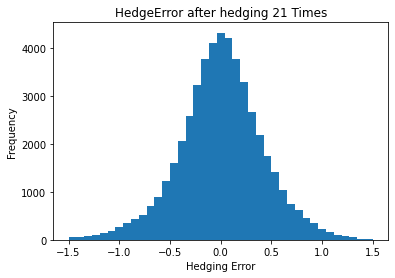

In [4]:
totalError21 = np.zeros((paths, ))
for i in range(steps21):
    stockp1 = blackscholespath21[:,i]
    stockp2 = blackscholespath21[:,i+1]
    phi1 = (phi(stockp1, K, r, sigma, maturity - T21[i] ) * stockp2)
    phi2 = (phi(stockp2, K, r, sigma, maturity - T21[i+1] ) *stockp2)
    stockError21 = phi1 - phi2
    psi1 = (psi_Bt(stockp1, K, r, sigma, maturity - T21[i]))
    psi2 = (psi_Bt(stockp2, K, r, sigma, maturity - T21[i+1]))
    bondError21 = psi1*np.exp(r*maturity/steps21)-psi2
    totalError21 += (stockError21 + bondError21)
#totalError21 = totalError21 - np.maximum(blackscholespath84[:,steps]-K,0)
#totalError21 += BlackScholesCall(S0, K, r, sigma, maturity)

plt.hist(totalError21,bins = np.linspace(-1.5,1.5,40))
plt.xlabel('Hedging Error')
plt.ylabel('Frequency')
plt.title('HedgeError after hedging 21 Times')
plt.show()

In [5]:
paths = 50000
steps84 = 84
maturity = 1/12

T84, W_T84 = simulate_Brownian_Motion(paths, steps84, maturity)
blackscholespath84 = S0*np.exp((r-sigma**2/2)*T84 + sigma*W_T84)

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


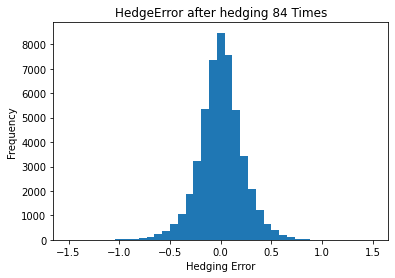

In [6]:
totalError84 = np.zeros((paths, ))
for i in range(steps84):
    stockp1 = blackscholespath84[:,i]
    stockp2 = blackscholespath84[:,i+1]
    phi1 = (phi(stockp1, K, r, sigma, maturity - T84[i] ) * stockp2)
    phi2 = (phi(stockp2, K, r, sigma, maturity - T84[i+1] ) *stockp2)
    stockError84 = phi1 - phi2
    psi1 = (psi_Bt(stockp1, K, r, sigma, maturity - T84[i]))
    psi2 = (psi_Bt(stockp2, K, r, sigma, maturity - T84[i+1]))
    bondError84 = psi1*np.exp(r*maturity/steps84)-psi2
    totalError84 += (stockError84 + bondError84)
#totalError84 = totalError84 - np.maximum(blackscholespath84[:,steps]-K,0)
#totalError84 += BlackScholesCall(S0, K, r, sigma, maturity)

plt.hist(totalError84,bins = np.linspace(-1.5,1.5,40))
plt.xlabel('Hedging Error')
plt.ylabel('Frequency')
plt.title('HedgeError after hedging 84 Times')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=84dba4f4-47dd-4672-95f1-e2f4f6eed8bc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>